<a href="https://colab.research.google.com/github/SandhyaBaskaran/assignment0_FNN/blob/main/CreateFNN_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np


In [ ]:
%%time
fashion_data = fashion_mnist.load_data()
##sweep pending

4423680/4422102 [==============================] - 0s 0us/step
CPU times: user 506 ms, sys: 166 ms, total: 672 ms
Wall time: 761 ms


In [ ]:
import pandas as pd
pd_df = pd.DataFrame(fashion_data)
(train_data_x, train_data_y), (test_data_x, test_data_y) = fashion_mnist.load_data()

In [ ]:

def  one_hot_encode(y,length):
    a = []
    for i in range(0,length):
        if y==i:
            a.append(1)
        else:
            a.append(0)
    return a
    

In [ ]:
##Getting one sample per class
indices={}
count=0
for y in train_data_y:
    
    if y not in indices.keys():
      indices[y]=count
    count = count + 1
    if len(indices.keys())==10:
      break


In [ ]:
indices

{0: 1, 1: 16, 2: 5, 3: 3, 4: 19, 5: 8, 6: 18, 7: 6, 8: 23, 9: 0}

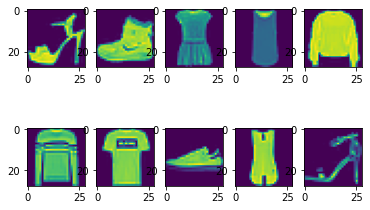

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
fig = plt.figure()
row=0
col=0
plot = gridspec.GridSpec(2,5)
for every_class in indices:

  fig.add_subplot(plot[row,col])
  matplotlib.pyplot.imshow(train_data_x[every_class])
  col=col+1
  if col==5:
    col=0
    row=1


In [ ]:
import math

def activation_fn(z):
    #sigmoid activation function
    return (1/(1+np.exp(-z)))  


In [ ]:
def softmax(x):
    return (np.exp(x)/np.exp(x).sum())

In [ ]:
def pd_lossFn(y_hat,y): ##cross entropy
    L = loss_Fn(y,x)
    return -(L/y_hat)


In [ ]:
def pd_cross_entropy(x,y):
    return x - y


In [ ]:
def pd_activation(x):
    return (x * (1-x))

In [ ]:
def loss_Fn(y,y_hat):
    l = - (np.dot(y,np.array([math.log(x) for x in y_hat]))) ##cross entropy
    return l
    


In [249]:
def grad_calculation(x,y,output):
    dw,db = 0,0
    print(output)
    dw = grad_w(x,y,output)
    db = grad_b(x,y,output)

    return dw,db



In [ ]:
def calculate_net(w,x,b): ## preactivation
    a  = np.dot(x,w) + b
    return a

In [267]:
def fnn(train_data_x,train_data_y, input_weights,input_bias,layer_weights,bias_weights, output_weights,output_bias, classes = 10 ):
      a_net = []
      bias = input_bias + bias_weights
      

      for x,y in zip(train_data_x,train_data_y):
          x = x.astype('float128').flatten()/255.0
          y = one_hot_encode(y,10)

          x = calculate_net(input_weights,x,input_bias)
          h  = x/max(x)
          #a_net.append(x)
          for i in range(0,len(layer_weights)):
              h =  calculate_net(layer_weights[i],h,bias_weights[i])
              h = h/max(h)
              a_net.append(h)
          O = calculate_net(output_weights,h,output_bias)
          pd_loss = pd_cross_entropy(softmax(O),y)


          ##backpropogate
          (dw_output,db_output) = grad_calculation(O,y,True)

          for i in range(1,len(layer_weights)+1):
              
              (dw,db) = grad_calculation(a_net[-i],y,False)
              
              
          break


In [264]:
def grad_w(x,y,output):
    if not output:
        fx = activation_fn(x)
    else:
        fx = softmax(x)
    return np.multiply(pd_activation(fx),x)



In [252]:
def grad_b(x,y,output):
    if not output:
        fx = activation_fn(x)
    else:
        fx = softmax(x)
    return pd_activation(fx)

In [268]:
%%time
hidden_layer_size = 3
hidden_nodes = 9
classes = 10
input_size = len(train_data_x.astype('float128')[0].flatten()/255.0)
input_weights = np.random.uniform(0,1,size = (input_size,hidden_nodes ))
input_bias = np.random.uniform(0,1,size = (hidden_nodes ))
layer_initial_weights = np.random.uniform(0,1,size=  (hidden_layer_size, hidden_nodes))
layer_bias_weights = np.random.uniform(0,1,size = (hidden_layer_size,hidden_nodes ))
output_initial_weights = np.random.uniform(0,1,size = (hidden_nodes, classes))
output_bias_weights = np.random.uniform(0,1,size = classes)
fnn(train_data_x,train_data_y, input_weights,input_bias, layer_initial_weights,layer_bias_weights, output_initial_weights,output_bias_weights)

True
False
False
False
CPU times: user 146 ms, sys: 0 ns, total: 146 ms
Wall time: 149 ms


In [ ]:
np.dot(train_data_x.astype('float128')[0].flatten()/255.0,layer_initial_weights.T)

In [ ]:
layer_initial_weights = np.random.uniform(0,1,size= input_size * hidden_layer_size * hidden_nodes)


In [ ]:
%%time
u_l,l_b,loss = fnn(x,y,u_l,l_b)


In [ ]:
def gradient_descent(trainx,trainy,weights,bias):
    for x,y in zip(trainx,trainy):
        u_l,l_b,loss = fnn(x,y,weights,bias)
    return loss
        

In [ ]:
learning_rate = 1e-3

In [ ]:
%%time
gradient_descent(train_data_x,train_data_y,u_l,l_b)

In [ ]:
def stochastic_gd(x,y):
    for i in 

In [ ]:
x = [1,2,3,4,5]
y = [0.1,2,3,4]
for i,j in zip(x,y):  
    print(i,j)
